### Import all the dependencies and libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

### Dataset Ames Housing

In [6]:
data = pd.read_csv('AmesHousing.csv')

print(data.head())

print("\nAmes Housing file:")
print(data.info())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [7]:
df = pd.read_csv("AmesHousing.csv") 

print(df.head())
print(df.columns)
print(df.dtypes)
print(df.info())


   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

### Missing Null values (Clean the dataset)

In [8]:
df = pd.read_csv("AmesHousing.csv")

df_clean = df.dropna(axis=1)

print(f"Original: {df.shape[1]}")
print(f"Clean code of NaN: {df_clean.shape[1]}")
print("\nClean dataset:")
print(df_clean.columns)

print(df.head())
print(df.columns)
print(df.dtypes)
print(df.info())

Original: 82
Clean code of NaN: 55

Clean dataset:
Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Heating',
       'Heating QC', 'Central Air', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Paved Drive', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type',
       'Sale Condition', 'SalePrice'],
      dtype='object')
   Order        PID  MS SubClass MS Zoning  Lot Fr

### Correlation Check & Feature Decision

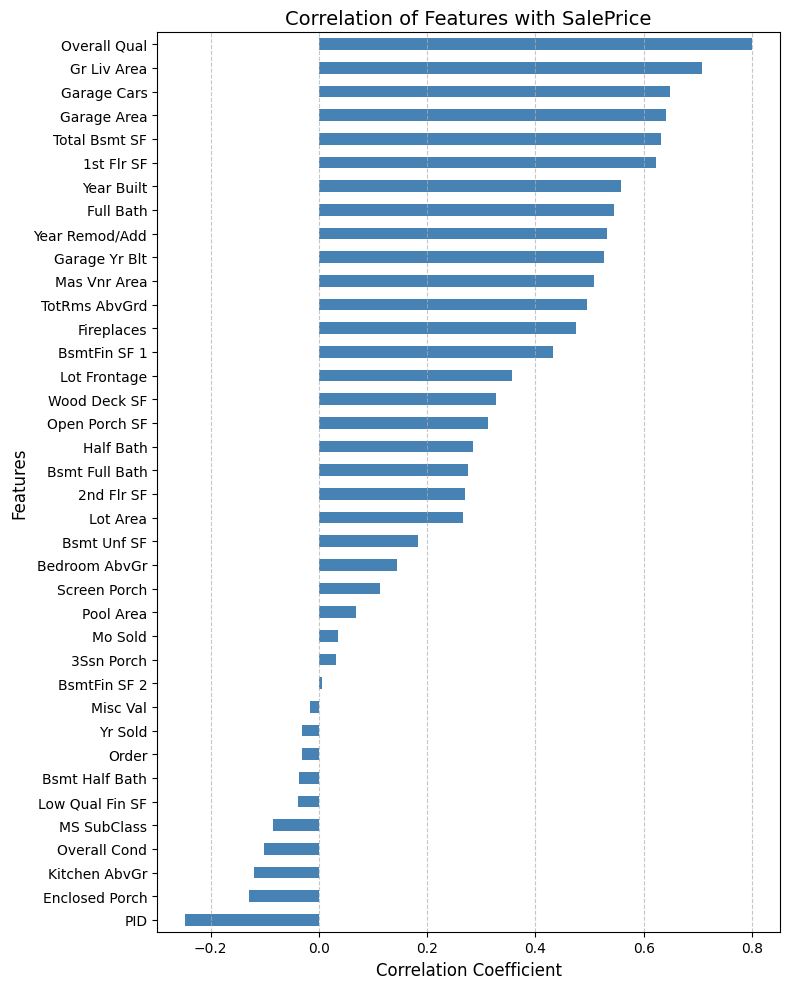

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_with_price = numeric_df.corr()['SalePrice'].sort_values(ascending=True)

plt.figure(figsize=(8, 10))
corr_with_price.drop('SalePrice').plot(kind='barh', color='steelblue')

plt.title('Correlation of Features with SalePrice', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



### Encode Categorical Variables

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


df = pd.read_csv("AmesHousing.csv")

# Check the colums
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
print(f"Total columnas categóricas: {len(cat_cols)}")
print(f"Total columnas numéricas: {len(num_cols)}")

# Show the unique values
for col in cat_cols:
    print(f"{col}: {df[col].unique()}\n")

# Define the Ordinal Encoding
ordinal_mappings = {
    "Lot Shape":         ["IR3", "IR2", "IR1", "Reg"],
    "Land Slope":        ["Sev", "Mod", "Gtl"],
    "Exter Qual":        ["Po", "Fa", "TA", "Gd", "Ex"],
    "Exter Cond":        ["Po", "Fa", "TA", "Gd", "Ex"],
    "Bsmt Qual":         ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    "Bsmt Cond":         ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    "Bsmt Exposure":     ["None", "No", "Mn", "Av", "Gd"],
    "BsmtFin Type 1":    ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "BsmtFin Type 2":    ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "Heating QC":        ["Po", "Fa", "TA", "Gd", "Ex"],
    "Kitchen Qual":      ["Po", "Fa", "TA", "Gd", "Ex"],
    "Functional":        ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"],
    "Paved Drive":       ["N", "P", "Y"],
}

# Validate the missing cols
missing_cols = [c for c in ordinal_mappings if c not in df.columns]
if missing_cols:
    raise KeyError(f"⚠️ Estas columnas ordinales no existen en df: {missing_cols}")

# Replace Nan for None
for col, order in ordinal_mappings.items():
    if "None" in order:
        df[col] = df[col].fillna("None")

# Apply the OrdinalEncoder
for col, order in ordinal_mappings.items():
    oe = OrdinalEncoder(categories=[order])
    df[[col]] = oe.fit_transform(df[[col]])
    
# Change float to integer
df[list(ordinal_mappings.keys())] = df[list(ordinal_mappings.keys())].astype(int)

# One-Hot Encoding for the other categories
onehot_features = [
    "MS Zoning", "Street", "Land Contour", "Utilities", "Lot Config",
    "Neighborhood", "Condition 1", "Condition 2", "Bldg Type", "House Style",
    "Roof Style", "Roof Matl", "Exterior 1st", "Exterior 2nd", "Foundation",
    "Heating", "Central Air", "Electrical", "Sale Type", "Sale Condition"
]

ohe = OneHotEncoder(drop="first", sparse_output=False)
encoded = ohe.fit_transform(df[onehot_features])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(onehot_features), index=df.index)

df = pd.concat([df.drop(columns=onehot_features), encoded_df], axis=1)

# Results
print("\n✅ Codificación completada.")
print(f"Dimensiones finales del dataset: {df.shape}")
print("\nColumnas codificadas (ejemplo):")
print(df.columns[:20])

pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)    

df.head(20)



Total columnas categóricas: 43
Total columnas numéricas: 39
MS Zoning: ['RL' 'RH' 'FV' 'RM' 'C (all)' 'I (all)' 'A (agr)']

Street: ['Pave' 'Grvl']

Alley: [nan 'Pave' 'Grvl']

Lot Shape: ['IR1' 'Reg' 'IR2' 'IR3']

Land Contour: ['Lvl' 'HLS' 'Bnk' 'Low']

Utilities: ['AllPub' 'NoSewr' 'NoSeWa']

Lot Config: ['Corner' 'Inside' 'CulDSac' 'FR2' 'FR3']

Land Slope: ['Gtl' 'Mod' 'Sev']

Neighborhood: ['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']

Condition 1: ['Norm' 'Feedr' 'PosN' 'RRNe' 'RRAe' 'Artery' 'PosA' 'RRAn' 'RRNn']

Condition 2: ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery' 'RRNn' 'RRAe' 'RRAn']

Bldg Type: ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']

House Style: ['1Story' '2Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '1.5Unf' '2.5Fin']

Roof Style: ['Hip' 'Gable'

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Alley,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141.0,31770,NaN,2,2,6,5,1960,1960,Stone,112.0,2,2,3,4,4,4,639.0,1,0.0,441.0,1080.0,1,1656,0,0,1656,1.0,0.0,1,0,3,1,2,7,7,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,1,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,215000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,